In [ ]:
# AR 모형을 임의로 생성하고, 다시 분석해 본다.
# 분석 결과가 임의로 생성할 때 사용한 파라메터와 잘 일치하는지 확인한다.
# 잘 일치한다면 향후 실제 시계열 데이터를 분석할 때 활용할 수 있다.

In [6]:
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# from MyUtil.MyTimeSeries import sampleARIMA, checkNormality
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf

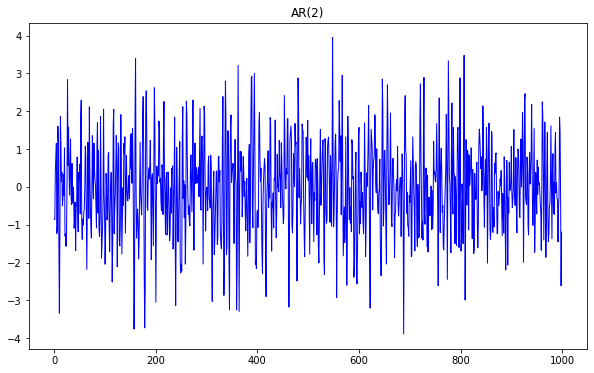

In [7]:
# AR(2) 샘플을 생성한다
y = sampleARIMA(ar=[0.5, -0.5], d=0, ma=[0], n=1000)
plt.figure(figsize=(10, 6))
plt.plot(y, color='blue', linewidth=1)
plt.title("AR(2)")
plt.show()

In [8]:
# 샘플링 데이터를 AR(2) 모형으로 분석한다 (Fitting)
model = ARIMA(y, order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1411.637
Method:                       css-mle   S.D. of innovations              0.992
Date:                Wed, 10 Mar 2021   AIC                           2831.275
Time:                        22:09:36   BIC                           2850.906
Sample:                             0   HQIC                          2838.736
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.032     -0.720      0.472      -0.085       0.039
ar.L1.y        0.4991      0.028     18.127      0.000       0.445       0.553
ar.L2.y       -0.4918      0.028    -17.840      0.0

In [11]:

# 시계열 데이터의 정규성을 확인한다
def checkNormality(data):
    fig = plt.figure(figsize=(10, 8))
    p1 = fig.add_subplot(2,2,1)
    p2 = fig.add_subplot(2,2,2)
    p3 = fig.add_subplot(2,2,3)
    p4 = fig.add_subplot(2,2,4)
    # 육안으로 백색 잡음 형태인지 확인한다
    p1.plot(data) 
    p1.set_title("Data")
    
    # Residual의 분포를 육안으로 확인한다
    r = np.copy(data)
    r.sort()
    pdf = stats.norm.pdf(r, np.mean(r), np.std(r))
    p2.plot(r,pdf)
    p2.hist(r, density=True, bins=100)
    p2.set_title("Distribution")
    
    # Q-Q plot을 그린다
    stats.probplot(data, dist="norm", plot=p3)
    
    # ACF plot을 확인한다. 백색 잡음은 자기상관성이 없다.
    plot_acf(data, lags=100, ax=p4)
    
    # Shapiro-Wilks 검정을 수행한다
    # (검정통계량, p-value)가 출력된다.
    # 귀무가설 : 정규분포 이다, 대립가설 : 아니다
    # p-value > 0.05 이면 귀무가설을 기각할 수 없다 --> "정규분포이다"
    w = stats.shapiro(data)
    print()
    print("Shapiro-Wilks 검정 : 검정통계량 = %.4f, p-value = %.4f" % (w[0], w[1]))


Shapiro-Wilks 검정 : 검정통계량 = 0.9988, p-value = 0.7558


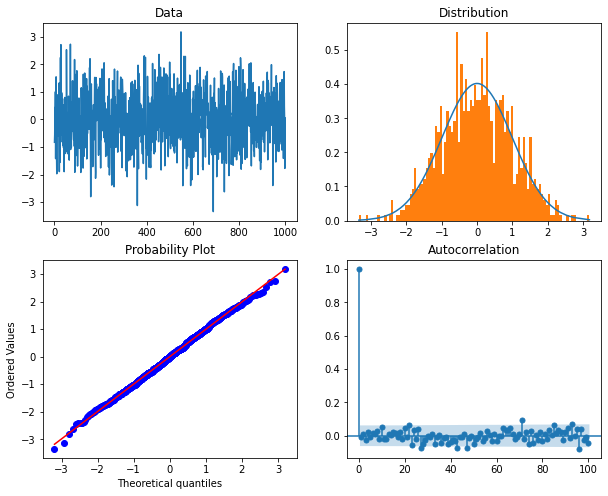

In [12]:
# Fitting이 잘되었는지 확인하기 위해 Residual을 분석한다.
# Residual은 실제 데이터와 추정치의 차이이므로 백색 잡음 (잔차) 이어야 한다.
# 따라서 Residual은 정규분포 특성을 가져야한다. 정규분포 특성을 조사하면 
# Fitting이 잘되었는지 확인할 수 있다.
residual = model_fit.resid
checkNormality(residual)  # 육안으로 백색 잡음 형태인지 확인한다